In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data['isFraud'].unique()

array([0, 1], dtype=int64)

In [6]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:
len(data['isFraud']==1)

6362620

In [8]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

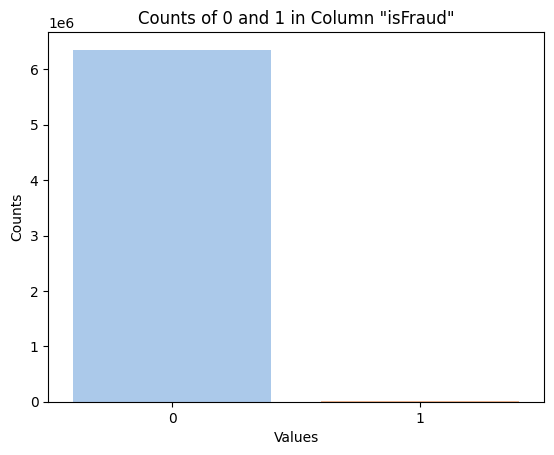

In [9]:
# Plotting with seaborn
sns.countplot(data=data, x='isFraud', palette='pastel')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Counts of 0 and 1 in Column "isFraud"')
plt.show()

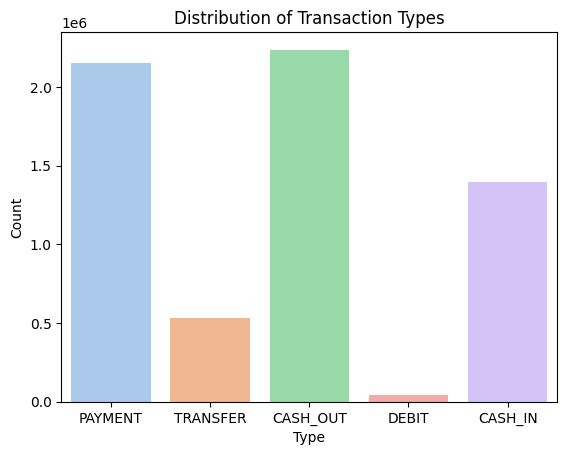

In [10]:
sns.countplot(data=data, x='type', palette='pastel')
plt.title('Distribution of Transaction Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

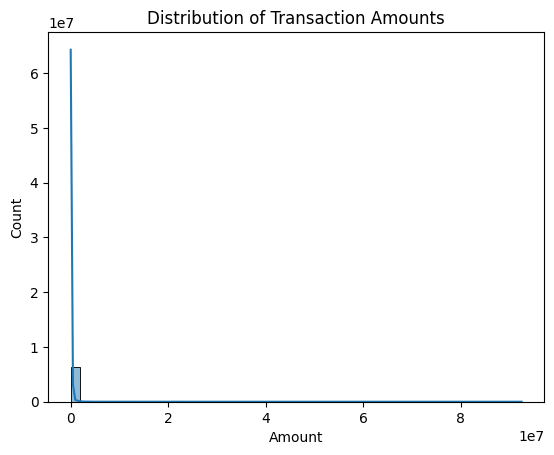

In [11]:
sns.histplot(data=data,x='amount', bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

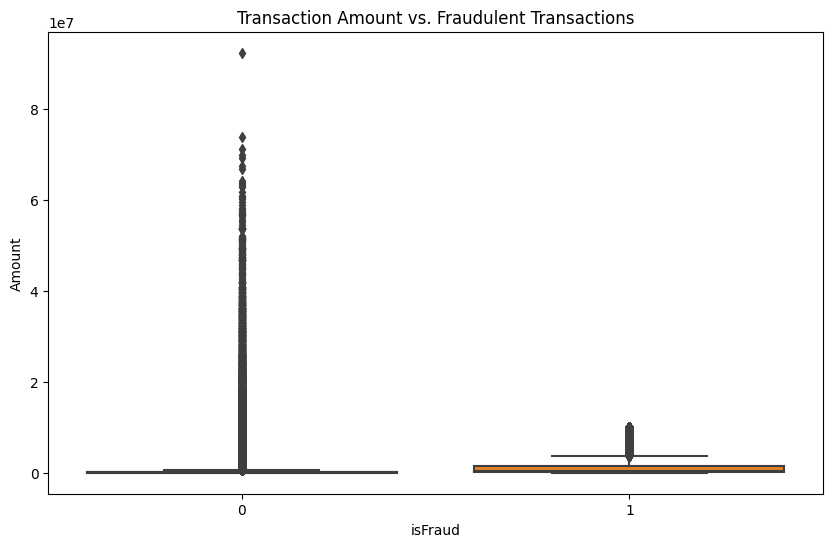

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Transaction Amount vs. Fraudulent Transactions')
plt.xlabel('isFraud')
plt.ylabel('Amount')
plt.show()

In [14]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


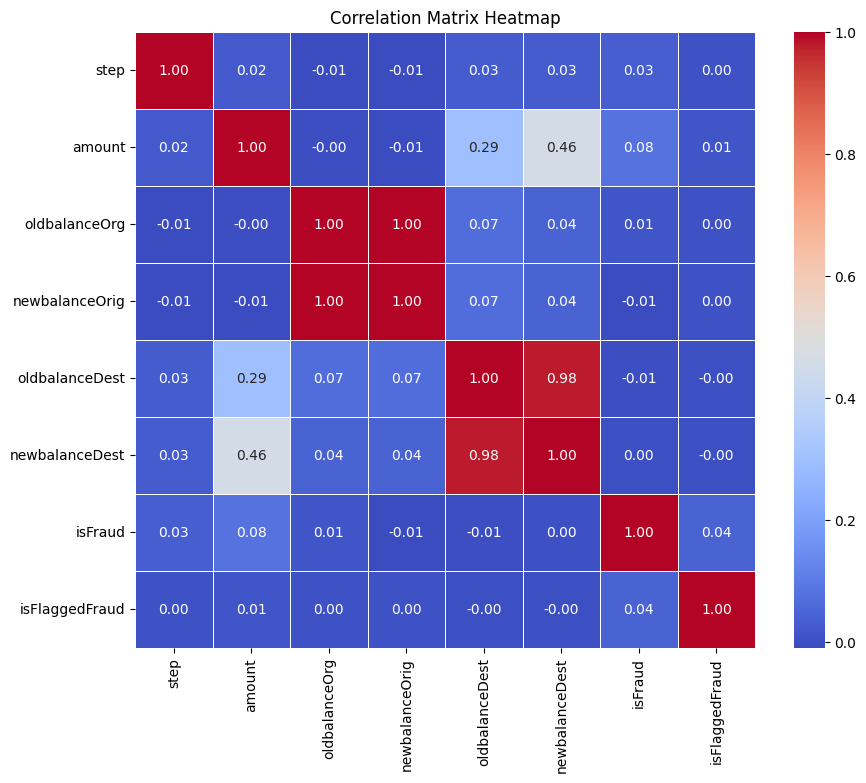

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
df = data

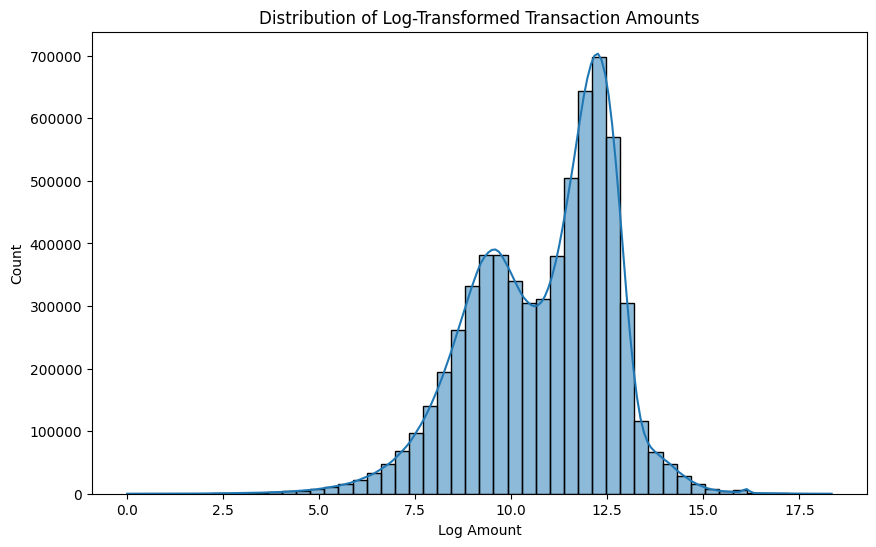

In [17]:
# Apply logarithmic transformation to transaction amounts
df['log_amount'] = np.log1p(df['amount'])

# Plot the histogram of log-transformed transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['log_amount'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Transaction Amounts')
plt.xlabel('Log Amount')
plt.ylabel('Count')
plt.show()

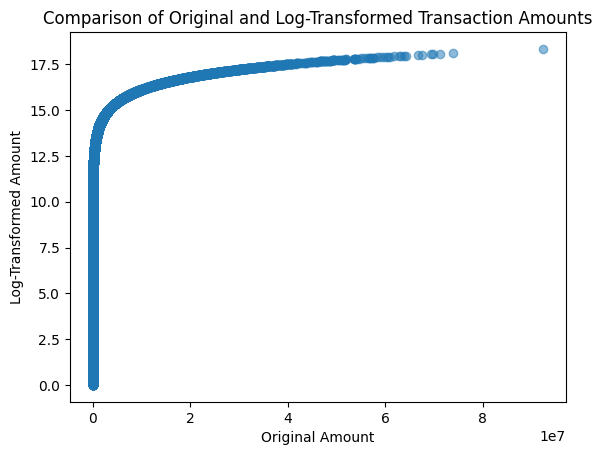

In [18]:
plt.scatter(df['amount'], df['log_amount'], alpha=0.5)
plt.title('Comparison of Original and Log-Transformed Transaction Amounts')
plt.xlabel('Original Amount')
plt.ylabel('Log-Transformed Amount')
plt.show()

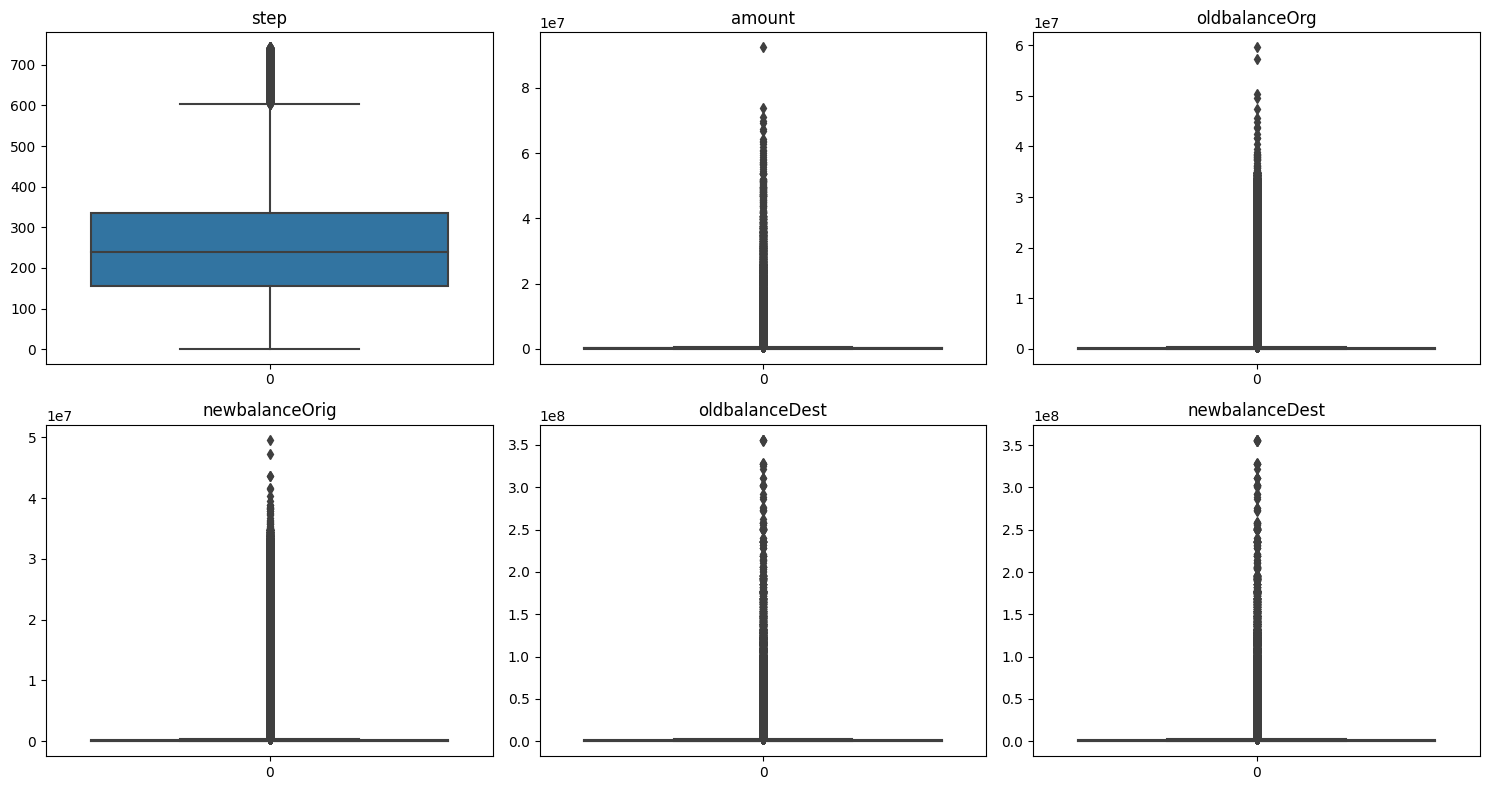

In [19]:
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Plot boxplots for each numerical feature to visualize outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [20]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

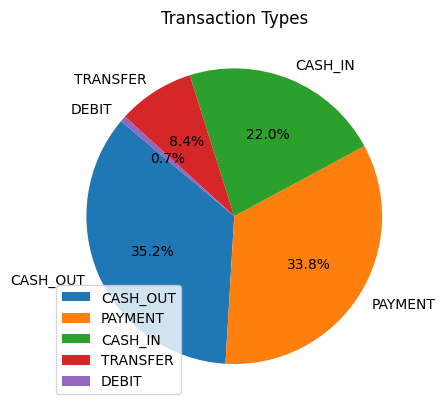

In [28]:
labels = data['type'].value_counts().index
sizes = data['type'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Transaction Types')
plt.axis('off')
plt.legend()
plt.show()

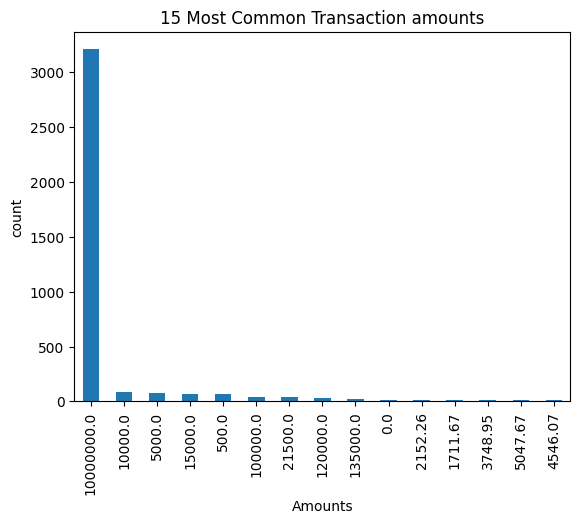

In [31]:
data['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts')
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

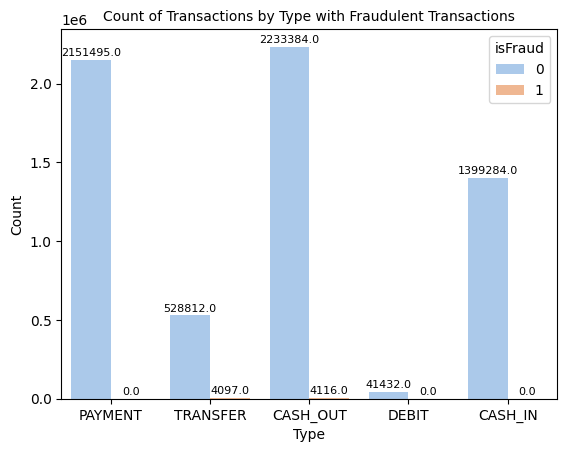

In [32]:
ax = sns.countplot(data=data, x='type', hue='isFraud', palette='pastel')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Transactions by Type with Fraudulent Transactions', fontsize=10)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

From the above graph we can see that only the **TRANSFER** and **CASH_OUT** transaction type has fraudulent transactions

In [33]:
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]

print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


In [34]:
print("TRANSFER Transaction:")
print(f"Minimum Transaction Amount: {dfFraudTransfer.amount.min()}")
print(f"Maximum Transaction Amount: {dfFraudTransfer.amount.max()}")

TRANSFER Transaction:
Minimum Transaction Amount: 63.8
Maximum Transaction Amount: 10000000.0


In [35]:
print("CASH_OUT Transaction:")
print(f"Minimum Transaction Amount: {dfFraudCashout.amount.min()}")
print(f"Maximum Transaction Amount: {dfFraudCashout.amount.max()}")

CASH_OUT Transaction:
Minimum Transaction Amount: 0.0
Maximum Transaction Amount: 10000000.0


Now we take a look at the **Type of Transaction** that are flagged to be fraud

In [38]:
data.loc[data.isFlaggedFraud==1].type.drop_duplicates().values

array(['TRANSFER'], dtype=object)

In [39]:
dfFlaggedFraud = data.loc[(data.isFlaggedFraud==1)]
print(f"No. of Transactions Flagged Fraud: {len(dfFlaggedFraud)}")

No. of Transactions Flagged Fraud: 16


In [40]:
print("Transactions Flagged Fraud:")
print(f"Minimum Transaction Amount: {dfFlaggedFraud.amount.min()}")
print(f"Maximum Transaction Amount: {dfFlaggedFraud.amount.max()}")

Transactions Flagged Fraud:
Minimum Transaction Amount: 353874.22
Maximum Transaction Amount: 10000000.0


As we can see that the frauds are clearly evident in **TRANSFER** Transaction type.
### **Dataset with TRANSFER Transactions**

In [41]:
dfTransfer = data.loc[data.type=='TRANSFER']
dfTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,5.204007
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,12.279840
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,12.649754
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0,11.044709
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0,10.662268
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0,11.263934
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0,9.754550
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0,0,11.274250
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0,12.322110
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0,11.743033


We check the **maximum** and **minimum** original balance of transactions that are flagged fraud

Frauds having same balance before and after transaction

Minimum

In [43]:
dfTransfer.loc[(dfTransfer.isFlaggedFraud==1)&(dfTransfer.oldbalanceOrg==dfTransfer.newbalanceOrig)].sort_values(by='oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,12.776700
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1,13.193056
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1,14.110419
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1,14.748723
6351225,702,TRANSFER,3171085.59,C1892216157,3171085.59,3171085.59,C1308068787,0.0,0.0,1,1,14.969585
6296014,671,TRANSFER,3441041.46,C917414431,3441041.46,3441041.46,C1082139865,0.0,0.0,1,1,15.051285
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1,15.089839
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,15.403151
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,15.415685
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1,15.551502


Maximum

In [45]:
dfTransfer.loc[(dfTransfer.isFlaggedFraud==1)&(dfTransfer.oldbalanceOrg==dfTransfer.newbalanceOrig)].sort_values(by='oldbalanceOrg', ascending=False).head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1,16.118096
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1,16.075714
6362460,730,TRANSFER,10000000.00,C2140038573,17316255.05,17316255.05,C1395467927,0.0,0.0,1,1,16.118096
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.0,0.0,1,1,15.805609
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1,16.118096
6281484,646,TRANSFER,399045.08,C724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1,12.896832
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1,15.551502
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,15.415685
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,15.403151
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1,15.089839
